In [1]:
import os
import cv2
import numpy as np

# Define the path to the dataset
data_dir = "D:/Traffic Signal Analysis/archive/Train"
classes = 43  # Total number of classes

data = []
labels = []

# Iterate over all class folders
for i in range(classes):
    path = os.path.join(data_dir, str(i))
    images = os.listdir(path)
    
    for img_name in images:
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)  # Read image
            img = cv2.resize(img, (32, 32))  # Resize to 32x32
            data.append(img)
            labels.append(i)  # Assign label as folder number
        except Exception as e:
            print(f"Error loading image {img_name}: {e}")

# Convert to NumPy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Total images loaded: {len(data)}")
print(f"Total labels loaded: {len(labels)}")


Total images loaded: 39209
Total labels loaded: 39209


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize pixel values (0-255 → 0-1)
data = data / 255.0  

# Convert labels to one-hot encoding
labels = to_categorical(labels, 43)  # 43 classes

# Split into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")


Training samples: 31367
Validation samples: 7842


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')  # 43 classes
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=15,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2917 - loss: 2.6016 - val_accuracy: 0.8973 - val_loss: 0.3704
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8599 - loss: 0.4574 - val_accuracy: 0.9708 - val_loss: 0.1196
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9361 - loss: 0.2081 - val_accuracy: 0.9787 - val_loss: 0.0772
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9607 - loss: 0.1329 - val_accuracy: 0.9853 - val_loss: 0.0637
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9714 - loss: 0.0953 - val_accuracy: 0.9892 - val_loss: 0.0357
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9753 - loss: 0.0809 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9816 - loss: 0.0663 - val_accuracy: 0.9929 - val_loss: 0.0290
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9824 - loss: 0.0631 - val_accuracy: 

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9937 - loss: 0.0301
Validation Accuracy: 99.44%


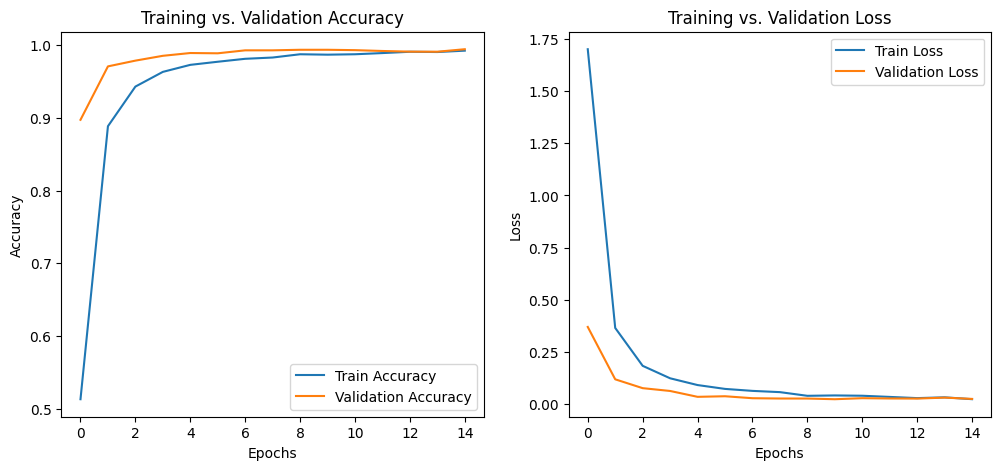

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')

plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.99      0.99      0.99       496
           2       0.99      0.99      0.99       450
           3       1.00      1.00      1.00       280
           4       1.00      0.99      1.00       418
           5       0.98      0.98      0.98       364
           6       0.95      1.00      0.98        59
           7       1.00      0.99      0.99       278
           8       0.99      1.00      0.99       301
           9       0.99      1.00      1.00       268
          10       1.00      1.00      1.00       370
          11       0.98      1.00      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      0.99      1.00       452
          14       1.00      1.00      1.00       162
          15       0.99      1.00      1.00       120
          16     

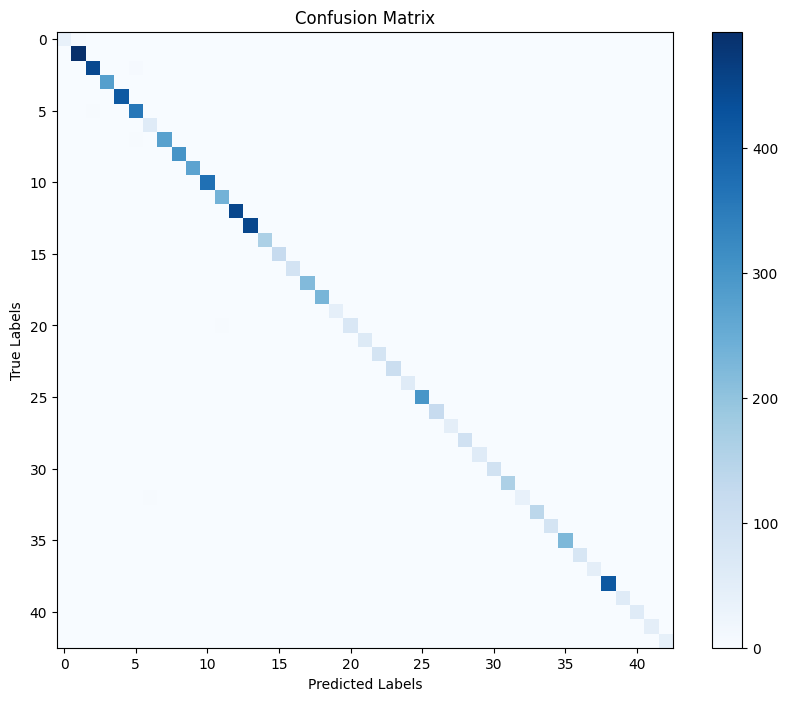

In [6]:
# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_val, axis=1)  # Convert one-hot encoding to class labels

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [9]:
import cv2
import numpy as np

# Class mapping dictionary
classes = { 
    1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)',
    4: 'Speed limit (60km/h)', 5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)',
    7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)', 9: 'Speed limit (120km/h)',
    10: 'No passing', 11: 'No passing veh over 3.5 tons', 12: 'Right-of-way at intersection',
    13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles',
    17: 'Veh > 3.5 tons prohibited', 18: 'No entry', 19: 'General caution',
    20: 'Dangerous curve left', 21: 'Dangerous curve right', 22: 'Double curve',
    23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right',
    26: 'Road work', 27: 'Traffic signals', 28: 'Pedestrians',
    29: 'Children crossing', 30: 'Bicycles crossing', 31: 'Beware of ice/snow',
    32: 'Wild animals crossing', 33: 'End speed + passing limits', 34: 'Turn right ahead',
    35: 'Turn left ahead', 36: 'Ahead only', 37: 'Go straight or right',
    38: 'Go straight or left', 39: 'Keep right', 40: 'Keep left',
    41: 'Roundabout mandatory', 42: 'End of no passing', 43: 'End no passing veh > 3.5 tons'
}

def predict_image(image_path, model):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (32, 32))  # Resize to match training size
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Reshape for model input

    # Predict the class
    prediction = model.predict(img)
    class_id = np.argmax(prediction)  # Get the class with the highest probability

    # Get the class name
    class_name = classes.get(class_id + 1, "Unknown")  # Adjust index for correct mapping

    print(f"Predicted Class: {class_name}")
    return class_name

# Example usage
test_image_path = "D:/Traffic Signal Analysis/archive/Test/00042.png"  # Replace with actual image path
predict_image(test_image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class: General caution


'General caution'